



# **Tarea 04 - Modelos Matemáticos**
**Profesor:** Jorge Mauricio Ruiz Vera




---







**Autores:**

*   Juan Diego Murcia Porras
*   Carlos Enrique Nosa Guzman
*   Brayan Alejandro Romero Castro



In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def Trapecio(f,a,b,n=300):
  h = float((b-a)/n)
  n = int(n)
  T = [a+i*h for i in range(n+1)]
  Valor = (h/2)*(f(T[0]) + f(T[n])) + sum([(h)*f(T[k]) for k in range(1,n)])
  return(Valor)

## Algunas simplificaciones a tener en cuenta

Como se mencionó en la guía, se supondrá la dirección de Ackerman para esta serie de problemas, que enuncia que un vehículo, cuando gira, tiene un centro instantáneo de giro que se puede hallar intersectando las lineas perpendiculares a cada rueda, como se ve en la siguiente figura.

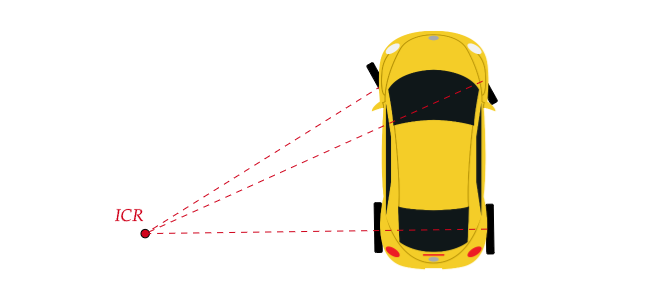

En el presente trabajo, tomaremos una simplificación, que se resume en asumir que el carro funciona como una bicicleta con dos ruedas centrales, y su centro instantáneo de rotación se puede hallar mediante la intersección de las rectas perpendiculares, como se muestra en la figura. Cuando se hable de que las llantas tienen un ángulo $\epsilon$, se refiere al ángulo que forma esta llanta central con el eje delantero, que está en el rango entre el ángulo de la llanta más cercana al ICR y de la que está más lejos del ICR, como se muestra en la siguiente figura.

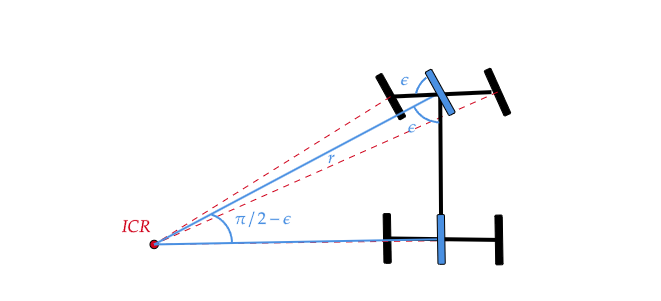

Para efectos prácticos, suponiendo que tenemos la longitud del auto $l$ y la mitad de su ancho $z$, hallaremos el radio de giro de cada una de las llantas del carro, que denotaremos por $\rho_{ij}$ donde $i\in \{d,t\}$ representa si la llanta es delantera o trasera, y $j\in\{p,a\}$ representa si la llanta está próxima o alejada del centro de rotación.

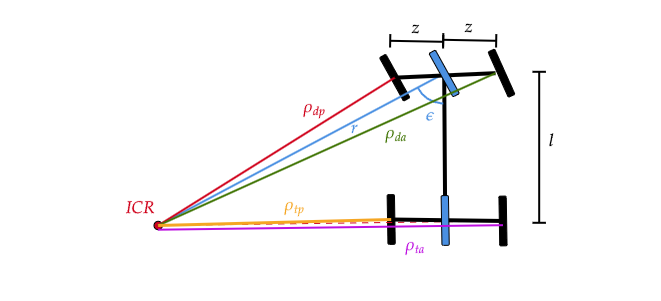

Si queremos expresar $r$ (el radio de giro de la parte superior del eje central del carro), note que $\cos\epsilon=l/r$, y por lo tanto
$$r=l\sec \epsilon.$$
El radio de giro $\rho_{dp}$ se puede hallar mediante el Torema del Coseno aplicado al tríangulo de lados $r$,$z$ y $\rho_{dp}$. Nótese que el ángulo que está comprendido entre el lado de longitud $r$ y el de longitud $z$ es de $\pi/2-\epsilon$. Así,\begin{align}
\rho_{dp}^2&=r^2+z^2-2rz \cos(\pi/2-\epsilon)\\
&=l^2\sec^2 \epsilon+z^2-2lz\tan\epsilon\\
&=l^2\tan^2\epsilon-2lz\tan\epsilon+z^2+l^2\\
&=(l\tan\epsilon-z)^2+l^2.
\end{align}
De manera similar, el radio $\rho_{da}$ se halla considerando el triángulo compuesto por los lados de longitud $r$,$z$ y $\rho_{da}$. En este caso,\begin{align}
\rho_{da}^2&=r^2+z^2-2rz\cos(\pi/2+\epsilon)\\
&=l^2\sec^2\epsilon+z^2+2lz\tan\epsilon\\
&=(l \tan\epsilon+z)^2+l^2.
\end{align}
El radio trasero próximo se halla notando que $\tan\epsilon=\frac{\rho_{ti}+z}{l}$. Entonces,
$$\rho_{tp}=l\tan\epsilon-z.$$
Por último, note que $\rho_{td}=\rho_{ta}+2z$. Así,
$$\rho_{ta}=l \tan\epsilon+z.$$

## ¿Cómo simular el movimiento del carro?

Para la simulación del carro, utilizaremos El modelo de bicicleta cinemática expuesto en $[1]$. Para este modelo, las dos ruedas delanteras y las dos traseras están agrupadas en una rueda cada una, como se muestra acontinuación:

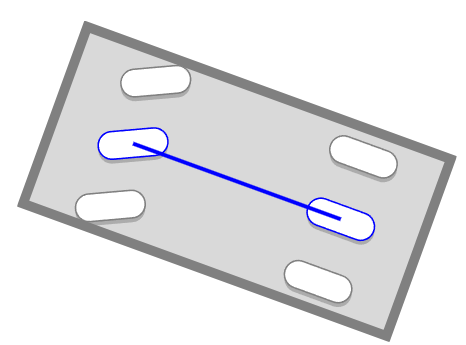

Para este modelo solo se tomara el  ángulo que se forma  entre la rueda que hemos pintado en el medio y la recta que pasa por ambas ruedas. A este angulo lo llamaremos $δ$, y cumple que $\delta=\pi/2-\epsilon$, como se muestra.

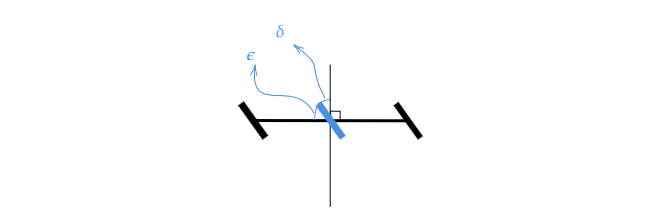

Además se hace la suposición de que las llantas no se deslizan, el timon tiene el mismo ángulo de giro que la llanta, y que las llantas se encuentran justamente en las esquinas del auto.

Dadas todas las anteriores suposiciones, procedamos a modelar, para ello nos guiaremos del siguiente dibujo:

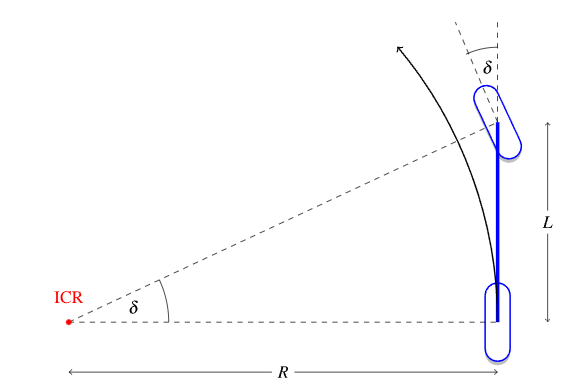


Del triangulo rectangulo que se forma con $R$ y  la longitud del carro $L$, vemos que

$$\tan(\delta)=\frac{L}{R}$$

Utilizando que la velocidad tangecial es $v=R\cdotω$, donde $\omega$, es la velocidad angular, obtenemos reemplazando $R$, en la anterior ecuacion por $\frac{v}{ω}$, que:

$$\omega = \frac{v\cdot \tan(\delta)}{L}$$

Luego como la velocidad angular es independiente del punto de referencia tenemos que  la rueda delantera gira alrededor de la rueda trasera con velocidad angular $\omega$. Dado que el vector de la rueda trasera a la delantera define la dirección de avance del vehículo, esto significa que el "vector de avance" gira con velocidad angular $ω$. De esta forma podemos llamar $\omega = \frac{d\theta}{dt}$, quedandonos la ecuación:

$$\frac{d\theta}{dt}=\frac{v\cdot \tan(\delta)}{L}$$

donde $\theta$ es es el angulo que forma el vector velocidad tangencial. Además se puede deducir que
$$\frac{dx}{dt}=v\cdot \cos(\theta) \ \frac{dy}{dt}=v\cdot \sin(\theta)$$.

Nótese que estas ecuaciones diferenciales son autónomas, es decir, que no dependen del tiempo. En la simulación se utilizará integración numérica para resolver este tipo de ecuaciones teniendo en cuenta los valores iniciales para cada una de las variables. Por facilidad, para cada uno de las trayectorias a estudiar se tomarán tres posibles estados de los ángulos $\epsilon$ y $\delta$:

*   Cuando forman un ángulo mínimo hacia la izquierda.
*   Cuando el ángulo que tienen es nulo (el carro va en línea recta).
*   Cuando forman un ángulo mínimo hacia la derecha.

Al tomar estos casos, bastará con considerar únicamente el $\epsilon$ mínimo que pueden girar las llantas de cada carro, y su respectivo complemento. Llamaremos a estos ángulos $\epsilon_{min}$ y $\delta_{max}$, que son ángulos complementarios.

Para hacer las simulaciones usaremos el modelo de ecuaciones diferenciales planteadas anteriormente. Además de esto consideramos que todos los carros involucrados tienen una longitud de $5m$ de largo y de $2m$ de ancho. En general, el ángulo mínimo que giran los carros oscila entre los $40°$ y los $46°$. Para las siguientes simulaciones, asumieremos que $\epsilon_{min}=42° = \pi/4$ o equivalentemente $\delta_{max}=48°=\pi/4$. Sin embargo, el usuario puede cambiar estos valores en la siguiente casilla.

In [4]:
#Se fijan valores para llas dimensiones del carro y para el ángulo máximo de giro
#respecto a la perpendicular al eje frontal del carro.
L = 5.0
z= 1.0
deltamax = (48)*np.pi/180

Considere el auto en el plano representado como un rectángulo con el parachoques apuntando en dirección de la línea en la siguiente figura. De lo anteriormente dicho, se sabe que el modelo de ecuaciones diferenciales modelan el punto central en la parte trasera del carro, representado en la figura como $CS$, por lo tanto:
* $CN  = CS + (L\cdot cos(\theta), L\cdot sin(\theta))$
* $P_1 = CS + (h\cdot sin(\theta), -h\cdot cos(\theta))$
* $P_2 = CS + (-h\cdot sin(\theta), h\cdot cos(\theta))$
* $P_3 = CN + (h\cdot sin(\theta), -h\cdot cos(\theta))$
* $P_4 = CN + (-h\cdot sin(\theta), h\cdot cos(\theta))$

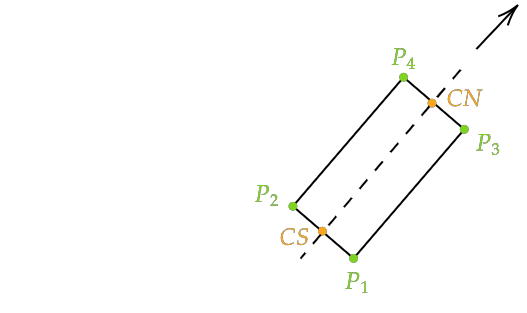

En el siguiente fragmento de código se muestra un ejemplo del uso del modelo de ecuaciones diferenciales para hallar la posición del carro en cualquier tiempo $t$. Realizaremos un ejemplo variando cada uno de estos parámetros.

In [5]:
# La siguiente función retorna el carro representado como un rectángulo en el plano
def Carro(T,x0,y0,theta0,d,vel):
  theta = lambda t:Trapecio(lambda x:(vel(x)*np.tan(d(x)))/L, 0,t) +theta0
  x = lambda t:Trapecio(lambda T:vel(T)*np.cos(theta(T)) ,0,t) +x0
  y = lambda t:Trapecio(lambda T:vel(T)*np.sin(theta(T)) ,0,t) +y0

  Th = theta(T)
  CS = np.array([x(T),y(T)])
  CN = CS + np.array([L*np.cos(Th),L*np.sin(Th)])
  P1 = CS + np.array([z*np.sin(Th),-z*np.cos(Th)])
  P2 = CS + np.array([-z*np.sin(Th),z*np.cos(Th)])
  P3 = CN + np.array([z*np.sin(Th),-z*np.cos(Th)])
  P4 = CN + np.array([-z*np.sin(Th),z*np.cos(Th)])

  Car = np.array([P1,P2,P4,P3,P1])
  return(Car)

In [ ]:
# Se define la velocidad en función del tiempo
def vprueba(t):
  if t<=15:
    return(0.4)
  if 15<t<=45:
    return(0.9)
  if t>45:
    return(1)

# Se define el ángulo de inclinación de las llantas frontales en función del tiempo
def deltaprueba(t):
  if t<=15:
    return(deltamax)
  if 15<t<=45:
    return(0)
  if t>45:
    return(-deltamax)

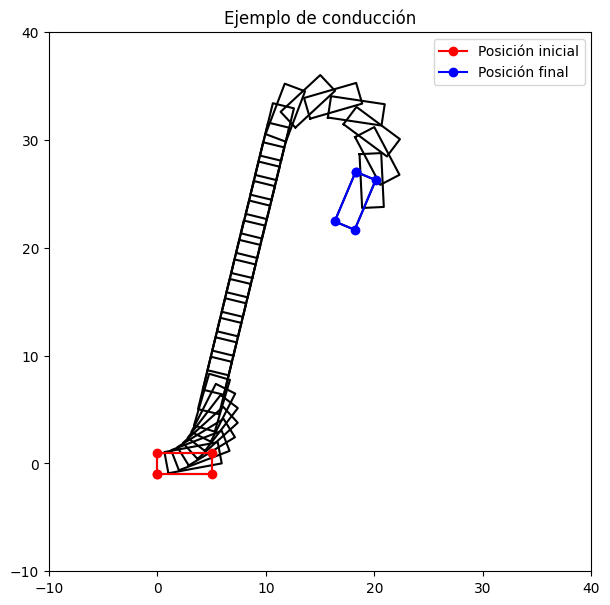

In [ ]:
plt.figure(figsize=(7,7))
for T in np.linspace(0,60,30):
  plt.plot(Carro(T,0,0,0,deltaprueba,vprueba)[:,0],
           Carro(T,0,0,0,deltaprueba,vprueba)[:,1],'k-')
plt.plot(Carro(0,0,0,0,deltaprueba,vprueba)[:,0],Carro(0,0,0,0,deltaprueba,vprueba)[:,1],
         'ro-',label="Posición inicial")
plt.plot(Carro(60,0,0,0,deltaprueba,vprueba)[:,0],Carro(60,0,0,0,deltaprueba,vprueba)[:,1],
         'bo-',label="Posición final")
plt.ylim(-10,40)
plt.xlim(-10,40)
plt.title("Ejemplo de conducción")
plt.legend()
plt.show()

A continuación se estudian diferentes situaciones de parqueo y, por medio de simulación y de algunas suposiciones mencionadas posteriomente se dan respuesta a las siguientes preguntas
1. ¿Cuál es el espacio mínimo necesario para parquear?
2. ¿A qué distancia de seguridad debe estar el carro de la línea de autos estacionados ?
3. ¿La distancia que el conductor debería 'sobrepasar' el bumper trasero del carro de adelante ?
4. ¿Que maniobra (la trayectoria) se debe hacer para parquear el carro?

Para la velocidad solo tomaremos dos opciones:
* La velocidad es igual a $1$ en todo tiempo si el auto se dirige hacia adelante.
* La velocidad es igual a $-1$ en todo tiempo si el vehículo va en reversa.



## Parqueo en batería

Para el parqueo en batería, queremos hallar una manera que sea sencilla de realizar para el conductor, y requiera del menor espacio posible entre carros para realizar su maniobra. Por ende, tenemos que lograr que el conductor pueda realizar su maniobra de tal manera que llegue a estar paralelo con los otros autos ANTES de entrar a su zona de parqueo, y moviendo sus ruedas únicamente entre los tres estados distinguidos más arriba. Distinguimos dos casos.

**Cuando parquea en reversa**

En este caso, se requiere que el conductor avance un poco más de la zona de parqueo, de manera que, al poner las ruedas en el ángulo mínimo $\epsilon_{min}$, llegue a la posición que se muestra en la figura.

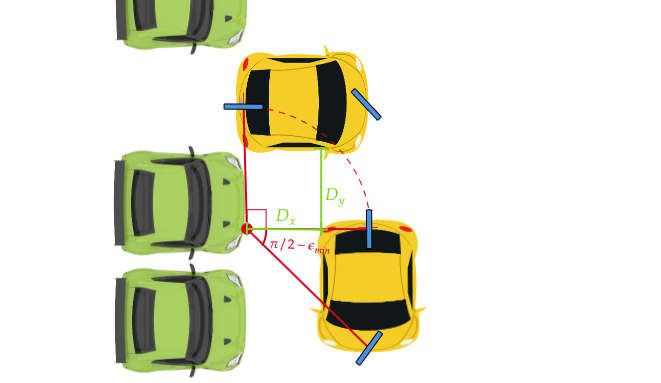

Posteriormente, el conductor deberá enderezar sus ruedas para que su ángulo sea nulo, y seguir con el carro en reversa para parquear correctamente. En este caso, hallamos cuál debe ser la distancia mínima que debe guardar la esquina trasera derecha (tanto en horizontal como vertical) que debe mantener el conductor con la esquina delantera izquierda del auto que quedará a la derecha del mismo En la figura, estas distancias están denotadas como $D_x$ y $D_y$. Note que, para realizar la primera maniobra llegando justo sobre la línea de carros (como se muestra en la figura) el ICR de giro debe estar ubicado sobre la línea de carros. El carro se gira $90°$ respecto a este ICR hasta llegar a la posición final deseada. En este caso, dadas las condiciones del movimiento, se requiere que $D_x=D_y=\rho_{tp}$. En conclusión,
$$D_x=D_y=l\tan (\epsilon_{min}) -z=l\cot (\delta_{max})-z.$$

Para la simulación suponga que la línea de carros es la recta $x=0$ y que el espacio de estacionamiento que tiene el vehículo que estamos parqueando está ubicado sobre el la recta $y=0$.

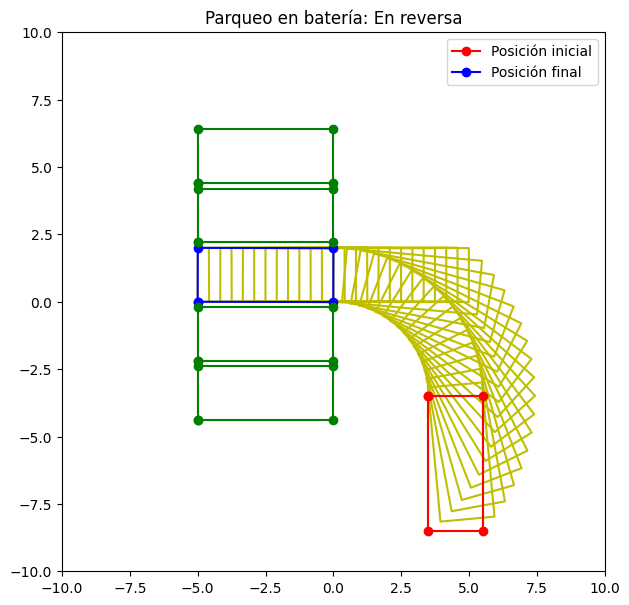

In [ ]:
#Condiciones iniciales
th1= - np.pi/2
x1 = L * (1/np.tan(deltamax))
y1 = -L * (1/np.tan(deltamax)) +z
#Tiempo en que el auto tarda en girar un ángulo th1
tf = (0-th1) * (L/np.tan(deltamax))

#Velocidad en función del tiempo
v1 = lambda t : -1
#Dirección de las ruedas en función del tiempo
def delta1(t):
  if t<=tf:
    return(-deltamax)
  else:
    return(0)

#Figura
fig, ax = plt.subplots(figsize=(7,7))
plt.xlim(-10,10)
plt.ylim(-10,10)
for T in np.linspace(0,tf+L,30):
  C = Carro(T,x1,y1,th1,delta1,v1)
  plt.plot(C[:,0],C[:,1],'y-')
plt.plot(Carro(0,x1,y1,th1,delta1,v1)[:,0],Carro(0,x1,y1,th1,delta1,v1)[:,1],
         'ro-', label="Posición inicial")
plt.plot(Carro(tf+L,x1,y1,th1,delta1,v1)[:,0],Carro(tf+L,x1,y1,th1,delta1,v1)[:,1],
         'bo-', label="Posición final")
plt.plot(Carro(0,-5,3.2,0,lambda t:0,lambda t:0)[:,0],
         Carro(0,-5,3.2,0,lambda t:0,lambda t:0)[:,1],'go-')
plt.plot(Carro(0,-5,-1.2,0,lambda t:0,lambda t:0)[:,0],
         Carro(0,-5,-1.2,0,lambda t:0,lambda t:0)[:,1],'go-')
plt.plot(Carro(0,-5,5.4,0,lambda t:0,lambda t:0)[:,0],
         Carro(0,-5,5.4,0,lambda t:0,lambda t:0)[:,1],'go-')
plt.plot(Carro(0,-5,-3.4,0,lambda t:0,lambda t:0)[:,0],
         Carro(0,-5,-3.4,0,lambda t:0,lambda t:0)[:,1],'go-')
plt.title("Parqueo en batería: En reversa")
plt.legend()
plt.show()

**Cuando parquea frontal**

En este caso, queremos realizar una maniobra muy similar a la enterior; realizar un giro con el ángulo mínimo de giro de manera que el carro quede paralelo al resto de autos antes de entrar a su zona de parqueo, para después alinear las llantas y entrar recto. Queremos hallar la distancia de seguridad que debe tener el auto, como se muestra en la figura.

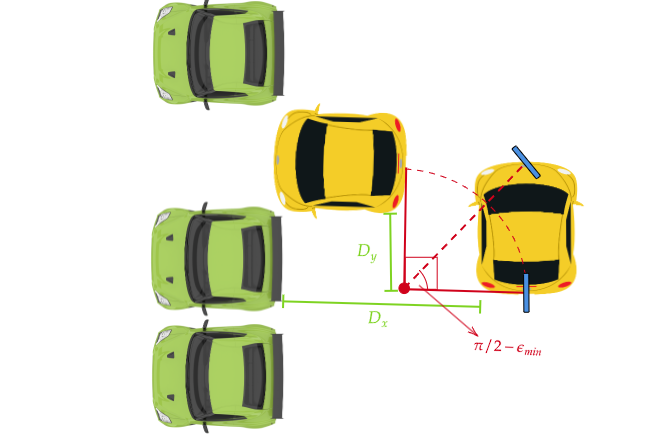


Por simplicidad, se hallará la distancia de seguridad que debe tener la esquina trasera izquierda del auto con respecto a la esquina trasera derecha del auto que quedará a su izquierda en el parqueo. Cualquier otra distancia se puede hallar a partir de esta. En este caso, note que $D_x=l+\rho_{tp}$ y $D_y=\rho_{tp}$. Por ende,
$$D_x=l+l\tan(\epsilon_{min})-z=l+l\cot(\delta_{max})-z$$
y
$$D_y=l\tan(\epsilon_{min})-z=l\cot(\delta_{max})-z.$$

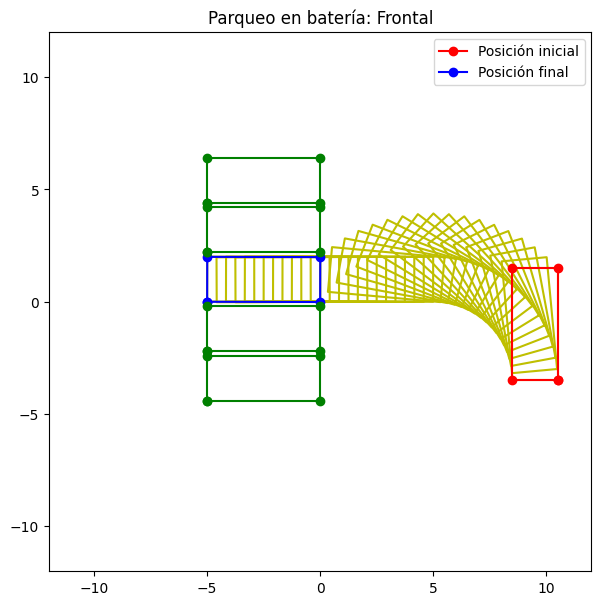

In [ ]:
#Condiciones iniciales
th2= np.pi/2
x2 = L+L * (1/np.tan(deltamax))
y2 = -L * (1/np.tan(deltamax)) +z
#Tiempo en que el auto tarda en girar un ángulo th1
tf = (th2) * (L/np.tan(deltamax))

#Velocidad en función del tiempo
v2 = lambda t : 1
#Dirección de las ruedas en función del tiempo
def delta2(t):
  if t<=tf:
    return(deltamax)
  else:
    return(0)


fig, ax = plt.subplots(figsize=(7,7))
plt.xlim(-12,12)
plt.ylim(-12,12)
for T in np.linspace(0,tf+L,30):
  C = Carro(T,x2,y2,th2,delta2,v2)
  plt.plot(C[:,0],C[:,1],'y-')
plt.plot(Carro(0,x2,y2,th2,delta2,v2)[:,0],Carro(0,x2,y2,th2,delta2,v2)[:,1],
         'ro-', label="Posición inicial")
plt.plot(Carro(tf+L,x1,y1,th1,delta1,v1)[:,0],Carro(tf+L,x1,y1,th1,delta1,v1)[:,1],
         'bo-', label="Posición final")
plt.plot(Carro(0,-5,3.2,0,lambda t:0,lambda t:0)[:,0],
         Carro(0,-5,3.2,0,lambda t:0,lambda t:0)[:,1],'go-')
plt.plot(Carro(0,-5,-1.2,0,lambda t:0,lambda t:0)[:,0],
         Carro(0,-5,-1.2,0,lambda t:0,lambda t:0)[:,1],'go-')
plt.plot(Carro(0,-5,5.4,0,lambda t:0,lambda t:0)[:,0],
         Carro(0,-5,5.4,0,lambda t:0,lambda t:0)[:,1],'go-')
plt.plot(Carro(0,-5,-3.4,0,lambda t:0,lambda t:0)[:,0],
         Carro(0,-5,-3.4,0,lambda t:0,lambda t:0)[:,1],'go-')
plt.title("Parqueo en batería: Frontal")
plt.legend()
plt.show()

## Parqueo oblicuo

De manera similar a como se realizó con el parqueo en batería, queremos que la maniobra sea lo más simple posible, y se requiera un espacio mínimo para ralizar la maniobra. De nuevo, ello se logra si el conductor logra llegar paralelo a los carros en el estacionamiento antes de entrar a la zona de parqueo, para posteriormente enderezar las ruedas y entrar. De nuevo, distinguimos dos casos.

**Cuando parquea en reversa**

Queremos realizar una trayectoria como se plantea en la siguiente figura, suponiendo que el ángulo que forman los carros con la vertical es $\alpha$.

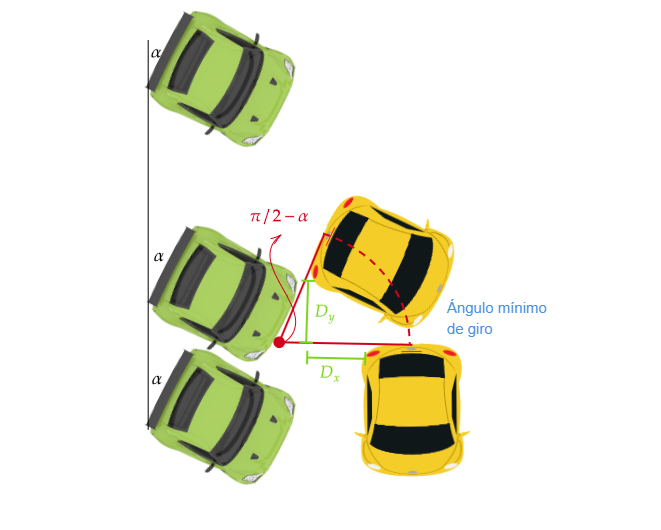

En esta situación, queremos que el carro gire $\pi/2-\alpha$ con respecto al ICR generado al formar el ángulo mínimo de giro con las llantas. Queremos hallar la distancia de seguridad (tanto horizontal como vertical) que debe guardar la esquina trasera derecha del auto con respecto a la esquina delantera izquierda del auto que quedará a la derecha del mismo en la zona de parqueo. Estas distancias se denotan en la figura como $D_x$ y $D_y$. Note que , en el peor de los casos, debe darse que el ICR esté en la línea genrada por la parte frontal del auto mencionado anteriormente, como se muestre. Así,\begin{align}
D_x&=\rho_{tp}-\rho_{tp}\cos (\pi /2-\alpha)\\
&=\rho_{tp}(1-\sin(\alpha))\\
&=(l\tan(\epsilon_{min})-z)(1-\sin\alpha)=(l\cot(\delta_{max})-z)(1-\sin\alpha).
\end{align}
y \begin{align}
D_y&=\rho_{tp}\sin(\pi/2-\alpha)\\
&=\rho_{tp}\cos(\alpha)\\
&=(l\tan(\epsilon_{min})-z)\cos(\alpha)=(l\cot(\delta_{max})-z)\cos(\alpha).
\end{align}

Note que, si $\alpha=0$, el parqueo se tiene que realizar en batería, y las distancias coinciden con las encontradas anteriormente.

Para la simulación medimos $D_x$ y $D_y$ desde el origen por facilidad.

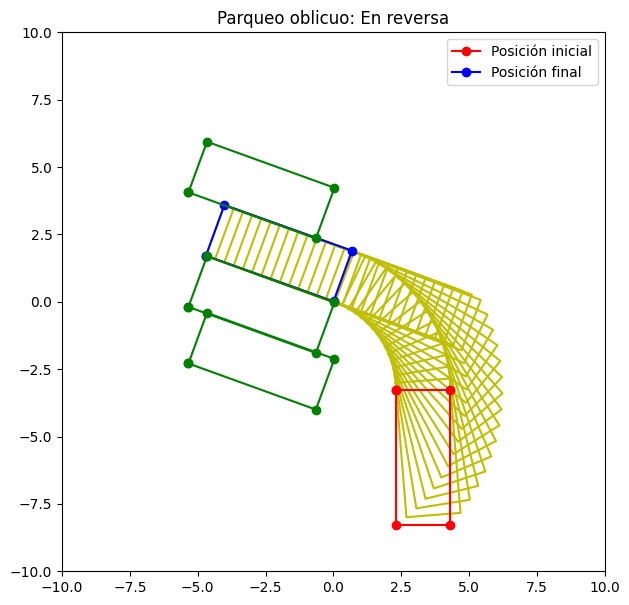

In [ ]:
#Ángulo de inclinación de los vehículos parqueados
alpha = np.pi/9
#Condiciones iniciales
th3= -np.pi/2
x3 = (L * (1/np.tan(deltamax))-z)*(1-np.sin(alpha))+z
y3 = -(L * (1/np.tan(deltamax)) -z)*np.cos(alpha)
#Tiempo en que tarda el vehículo en girar un ángulo alpha
tf = abs(-alpha-th3) * (L/np.tan(deltamax))

#Velocidad en función del tiempo
v3 = lambda t : -1
#Dirección de las ruedas en función del tiempo
def delta3(t):
  if t<=tf:
    return(-deltamax)
  else:
    return(0)

#Figura
fig, ax = plt.subplots(figsize=(7,7))
plt.xlim(-10,10)
plt.ylim(-10,10)
for T in np.linspace(0,tf+L,30):
  C = Carro(T,x3,y3,th3,delta3,v3)
  plt.plot(C[:,0],C[:,1],'y-')
plt.plot(Carro(0,x3,y3,th3,delta3,v3)[:,0],Carro(0,x3,y3,th3,delta3,v3)[:,1],
         'ro-', label="Posición inicial")
plt.plot(Carro(tf+L,x3,y3,th3,delta3,v3)[:,0],Carro(tf+L,x3,y3,th3,delta3,v3)[:,1],
         'bo-', label="Posición final")
plt.plot(Carro(0,-5,0.75,-alpha,lambda t:0,lambda t:0)[:,0],
         Carro(0,-5,0.75,-alpha,lambda t:0,lambda t:0)[:,1],'go-')
plt.plot(Carro(0,-5,-1.35,-alpha,lambda t:0,lambda t:0)[:,0],
         Carro(0,-5,-1.35,-alpha,lambda t:0,lambda t:0)[:,1],'go-')
plt.plot(Carro(0,-5,4,-alpha,lambda t:0,lambda t:0)[:,0],
         Carro(0,-5,5,-alpha,lambda t:0,lambda t:0)[:,1],'go-')
plt.title("Parqueo oblicuo: En reversa")
plt.legend()
plt.show()

**Cuando parquea frontal**

De manera similar al caso anterior, queremos realizar una trayectoria como se describe en la siguiente figura, para posteriormente alinear las llantas y entrar recto.

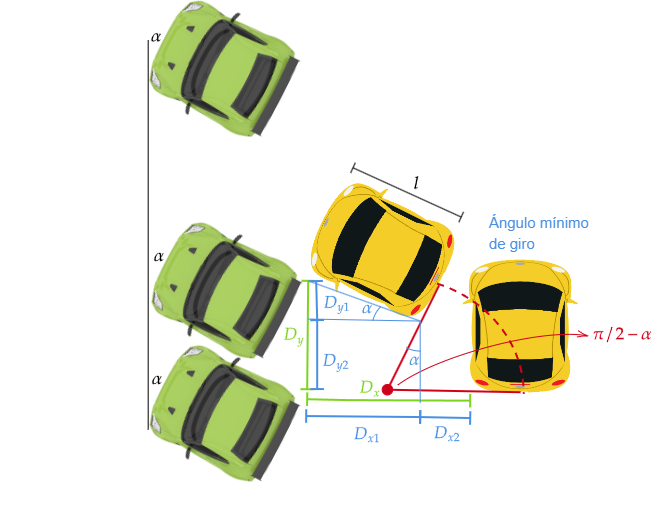

De nuevo, el carro gira $\pi/2-\alpha$ con respecto al ICR. Buscamos las distancias de seguridad que se mantienen tanto horizontal como verticalmente entre la esquina delantera izquierda del conductor y la esquina trasera derecha del carro a la izquierda de su zona de parqueo. Estas distancias son denotadas como $D_x$ y $D_y$ en la figura. Conviene expresar $D_x=D_{x1}+D_{x2}$ y $D_{y}=D_{y1}+D_{y2}$. Así,\begin{align}
D_{x}&=l\cos(\alpha)+\rho_{tp}(1-\sin(\alpha))\\
&=l\cos(\alpha)+(l\tan(\epsilon_{min})-z)(1-\sin(\alpha))\\
&=l\cos(\alpha)+(l\cot(\delta_{max})-z)(1-\sin(\alpha)).
\end{align}
y
\begin{align}
D_y&=l\sin(\alpha)+\rho_{tp}\cos(\alpha)\\
&=l\sin(\alpha)+(l\tan(\epsilon_{min})-z)\cos(\alpha)\\
&=l\sin(\alpha)+(l\cot(\delta_{max})-z)\cos(\alpha).
\end{align}
De nuevo, note que para $\alpha=0$ se obtiene el caso de parqueo en batería, y las distancias coinciden con las obtenidas.

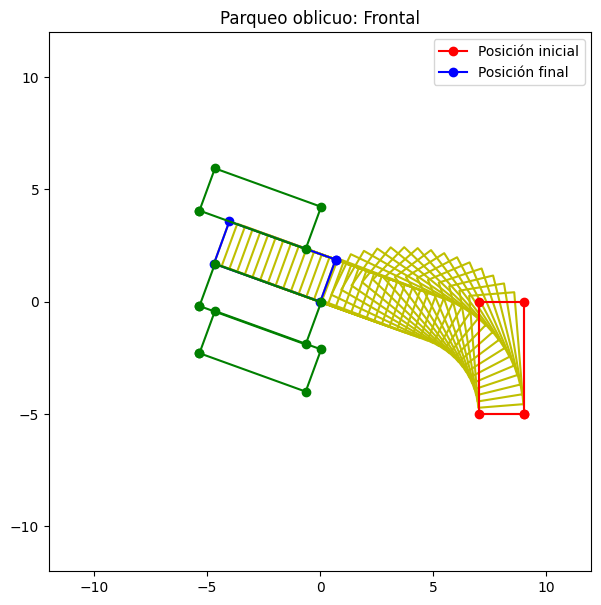

In [ ]:
#Ángulo de inclinación de los vehículos parqueados
alpha = np.pi/9
#Condiciones iniciales
th4= np.pi/2
x4 = (L*np.cos(alpha))+(L * (1/np.tan(deltamax))-z)*(1-np.sin(alpha))+z
y4 = -((L*np.sin(alpha))+(L *(1/np.tan(deltamax)) -z)*np.cos(alpha))
#Tiempo en que tarda el vehículo en girar un ángulo alpha
tf = abs(th4-alpha) * (L/np.tan(deltamax))

#Velocidad en función del tiempo
v4 = lambda t : 1
#Dirección de las ruedas en función del tiempo
def delta4(t):
  if t<=tf:
    return(deltamax)
  else:
    return(0)

#Figura
fig, ax = plt.subplots(figsize=(7,7))
plt.xlim(-12,12)
plt.ylim(-12,12)
for T in np.linspace(0,tf+L,30):
  C = Carro(T,x4,y4,th4,delta4,v4)
  plt.plot(C[:,0],C[:,1],'y-')
plt.plot(Carro(0,x4,y4,th4,delta4,v4)[:,0],Carro(0,x4,y4,th4,delta4,v4)[:,1],
         'ro-', label="Posición inicial")
plt.plot(Carro(tf+L,x4,y4,th4,delta4,v4)[:,0],Carro(tf+L,x4,y4,th4,delta4,v4)[:,1],
         'bo-', label="Posición final")
plt.plot(Carro(0,-5,0.75,-alpha,lambda t:0,lambda t:0)[:,0],
         Carro(0,-5,0.75,-alpha,lambda t:0,lambda t:0)[:,1],'go-')
plt.plot(Carro(0,-5,-1.35,-alpha,lambda t:0,lambda t:0)[:,0],
         Carro(0,-5,-1.35,-alpha,lambda t:0,lambda t:0)[:,1],'go-')
plt.plot(Carro(0,-5,4,-alpha,lambda t:0,lambda t:0)[:,0],
         Carro(0,-5,5,-alpha,lambda t:0,lambda t:0)[:,1],'go-')
plt.title("Parqueo oblicuo: Frontal")
plt.legend()
plt.show()

## Parqueo en paralelo

El caso del parqueo en paralelo es más complejo y lo dividiremos en tres etapas, que se indican en la siguiente figura. La primera, en la que se giran las llantas con un ángulo mínimo para ingresar el carro hasta que la esquina más cercana al ICR supere la parte trasera del carro de adelante; la segunda, en la que se enderezan las llantas del carro y se retrocede hasta que la esquina delantera respectiva haya superado la parte trasera del mismo auto; y la tercera, en la que se invierte la dirección del ángulo mínimo para enderezar el carro.

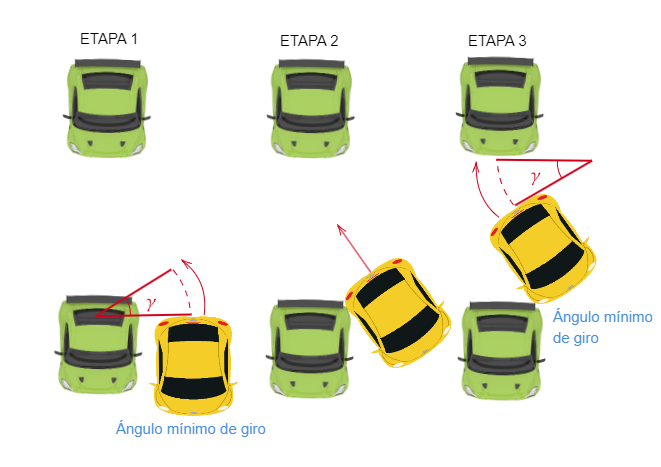

Podríamos analizar qué sucede cuando el carro viene frontal. Sin embargo, para minimizar el espacio necesario de parqueo se requiere que la etapa 3 se realice en un espacio mínimo vertical. Como ya se ha notado en las anteriores situaciones de parqueo, se requiere de un menor espacio vertical cuando se requiere alinear la parte delantera del carro; es decir, cuando el carro se parquea en reversa en paralelo. Por ello, solo tenresmo en cuenta este caso para este análisis en específico. \\
En aras de simplificar el análisis, analizaremos las etapas en desorden, y juntaremos los respectivos resultados para analizar el parqueo completo

**Etapa 3**

Una ventaja de la etapa 3 es que se puede analizar fácilmente si se toma en el sentido contrario; es decir, cuando el carro está saliendo de la zona de parqueo, como se muestra en la siguiente figura.

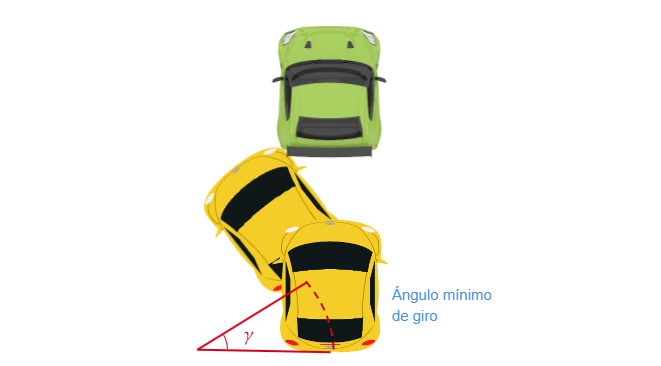

Hallemos el espacio mínimo que requiere un auto parqueado en paralelo como se muestra más arriba para salir. Para ello, considere un sistema de coordenadas con su origen en el ICR.

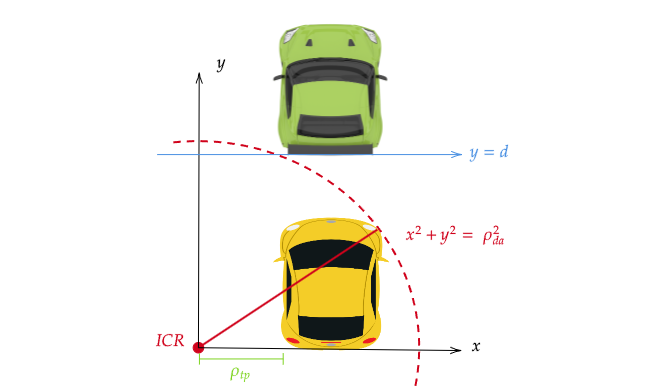

Queremos que la distancia entre los carros sea suficiente para que el carro pase; es decir, que la intersección de la circunferencia $x^2+y^2=\rho_{da}^2$ con la recta $y=d$ sea menor o igual a $\rho_{tp}$, donde $d$ indica el espacio que hay en la zona de parqueo. Tal intersección $(x_0,y_0)$ satisface que $y_0=d$ y
$$x_0^2+d^2=\rho_{da}^2$$
Luego,
$$x_0^2+d^2=(l\tan(\epsilon_{min})+z)^2+l^2$$
y
$$x_0^2=(l\tan(\epsilon_{min})+z)^2+l^2-d^2.$$
Como ya se mencionó, queremos que $x_0$ se ubique más a la izquierda de $\rho_{tp}$. En el peor de los casos, se debe dar $x_0=\rho_{tp}$; entonces, $x_0^2=\rho_{tp}^2$ y
\begin{align}(l\tan(\epsilon_{min})+z)^2+l^2-d^2&=(l\tan(\epsilon_{min}) -z)^2\\
l^2\tan^2(\epsilon_{min})+2lz\tan(\epsilon_{min}) +z^2+l^2-d^2&=l^2\tan^2(\epsilon_{min})-2lz\tan(\epsilon_{min}) +z^2\\
l^2+4lz\tan(\epsilon_{min})=d^2.
\end{align}
Por ende, concluimos que la distancia mínima que puede tener la zona de parqueo para parquear en paralelo (esta distancia no depende de las demás etapas) debe ser de
$$d=\sqrt{l^2+4lz\tan(\epsilon_{min})}=\sqrt{l^2+4lz\cot(\delta_{max})}.$$


Por ejemplo, para el VW golf, que tiene un largo de $4.284~m$, un ancho de $1.789~m$, y un ángulo mínimo de $42°$ de torsión de sus llantas, calculemos el espacio mínimo necesario para parquear en paralelo este carro.

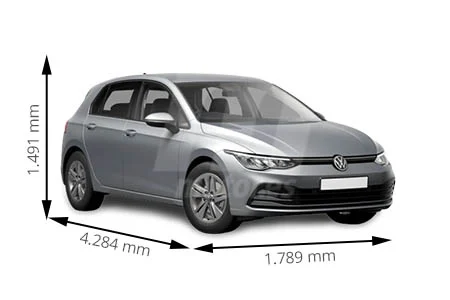

In [ ]:
np.sqrt(4.284**2+4*(4.284)*(1.789/2)*np.tan(42*np.pi/180))

5.670466123028337

Calculemos también el espacio mínimo que requiere el Mercedes Smart, que tiene un largo de $2.695~m$, un ancho de $1.663~m$, y un ángulo mínimo de torsión de sus ruedas delanteras de $42°$.

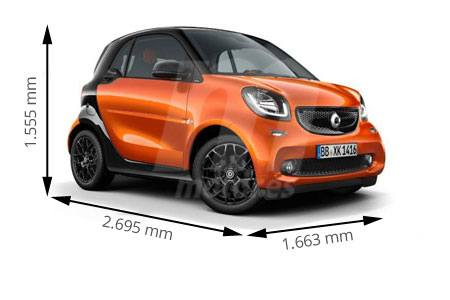

In [ ]:
np.sqrt(2.695**2+4*(2.695)*(1.663/2)*np.tan(42*np.pi/180))

3.9158472492356986

Por último, calculemos la distancia mínima para parquear el Mercedes A class, que tiene un largo de $4.419~m$, un ancho de $1.796~m$, y un ángulo mínimo de torsión de sus ruedas delanteras de $40°$.

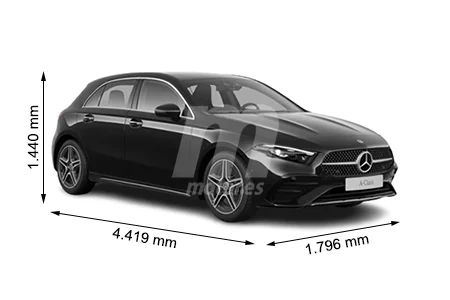

Todas las anteriores fotos han sido tomadas del sitio Web [motor.es](https://www.motor.es/).

Para simplificar nuestro análisis, asumiremos que este es el espacio disponible para que el carro estacione. Si fuera mayor, se podría realizar el mismo análisis, asumiendo una "franja de seguridad" entre el carro de adelante y el que se quiere parquear.

Para analizar la etapa 1, nos será utilidad hallar el ángulo $\gamma$ que se desplaza el carro durante esta etapa 3, para quedar en la posición deseada. Considere la siguiente gráfica.

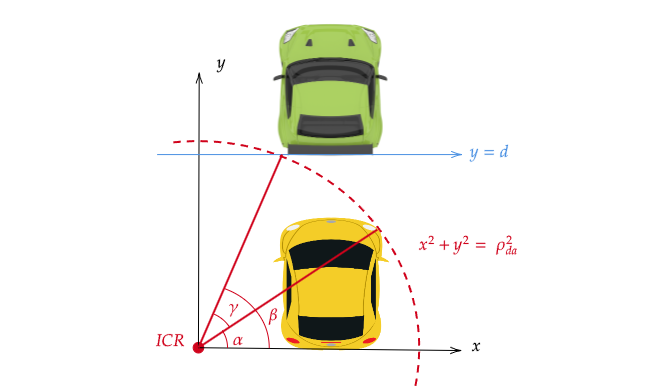

El ángulo que recorre la esquina superior derecha (y por ende todo el carro) durante la etpa 3 es $\gamma=\beta-\alpha$. Nótese que
$\sin(\alpha)=\frac{l}{\rho_{da}}$ y que $\cos(\alpha)=\frac{\rho_{ta}}{\rho_{da}}$; similarmente, $\sin(\beta)=\frac{d}{\rho_{da}}$ y $cos(\beta)=\frac{\rho_{tp}}{\rho_{da}}$.

Entonces,
\begin{align}
\sin (\gamma)&=\sin(\beta)\cos(\alpha)-\sin(\alpha)\cos(\beta)\\
&=\left(\frac{d}{\rho_{da}}\right)\left(\frac{\rho_{ta}}{\rho_{da}}\right)-\left(\frac{l}{\rho_{da}}\right)\left(\frac{\rho_{tp}}{\rho_{da}}\right)\\
&=\left(\frac{1}{\rho_{da}^2}\right)\left(d\rho_{ta}-l\rho_{tp}\right)\\
&=\left(\frac{1}{\rho_{da}^2}\right)\left(d(l\tan(\epsilon_{min})+z)-l(l\tan(\epsilon_{min})-z)\right)\\
&=\left(\frac{1}{\rho_{da}^2}\right)\left(l\tan(\epsilon_{min})(d-l)+z (d+l)\right)\\
&=\left(\frac{1}{\rho_{da}^2}\right)\left(l\cot(\delta_{max})(d-l)+z (d+l)\right)
\end{align}
y \begin{align}
\cos(\gamma)&=\cos(\alpha)\cos(\beta)+\sin(\alpha)\sin(\beta)\\
&=\left(\frac{\rho_{ta}}{\rho_{da}}\right)\left(\frac{\rho_{tp}}{\rho_{da}}\right)+\left(\frac{l}{\rho_{da}}\right)\left(\frac{d}{\rho_{da}}\right)\\
&=\left(\frac{1}{\rho_{da}^2}\right)\left(\rho_{ta}\rho_{tp}+ld\right)\\
&=\left(\frac{1}{\rho_{da}^2}\right)\left((l\tan(\epsilon_{min})+z)(l\tan(\epsilon_{min})-z)+ld\right)\\
&=\left(\frac{1}{\rho_{da}^2}\right)\left(l^2\tan^2(\epsilon_{min})-z^2+ld\right)\\
&=\left(\frac{1}{\rho_{da}^2}\right)\left(l^2\cot^2(\delta_{max})-z^2+ld\right).
\end{align}

Por ende, el auto debe tener una inclinación de $\gamma$ tan pronto como su esquina superior derecha supere a la inferior izquierda del auto de adelante, para poder girar y llegar a estacionarse prefectamente en paralelo.

**Etapa 2**

La etapa 2 representa una transición entre la etapa 1 y la etapa 3, y no representa mayor complejidad. Basta anotar dos aspectos al respecto:

*   El carro se moviliza en linea recta $l$ unidades, pasando de tener su esquina trasera derecha alineada con la esquina trasera izquierda del auto delantero, a tener su esquina superior derecha alineada con esta misma esquina.
*   El ángulo del auto con respecto a la horizontal $\gamma$ no cambia durante esta etapa.



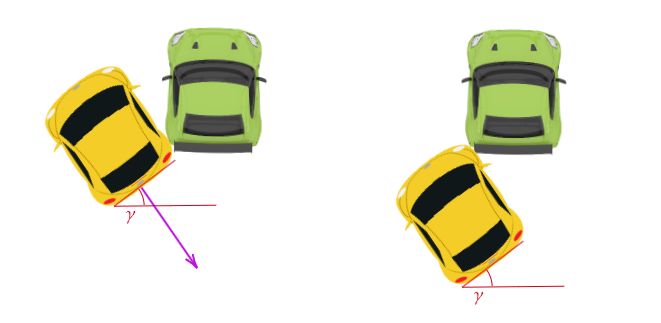

**Etapa 1**

La restricción que debe tenerse en cuenta durante esta etapa es que el auto llegue precisamente a la posición deseada antes de llegar a la etapa 2. Es decir, que su esquina trasera derecha llegue a toparse con la esquina trasera izquierda del auto de adelante mientras mantiene un ángulo $\gamma$ específico con respecto a la horizontal. Note que esta última condición es clave, dado que garantiza que el auto va a quedar derecho y alineado con el resto de carros al finalizar la etapa 3. Si suponemos que el carro parte paralelo a los carros, entonces ello es equivalente a que el carro recorra un ángulo $\gamma$, como se muestra en la siguiente figura.

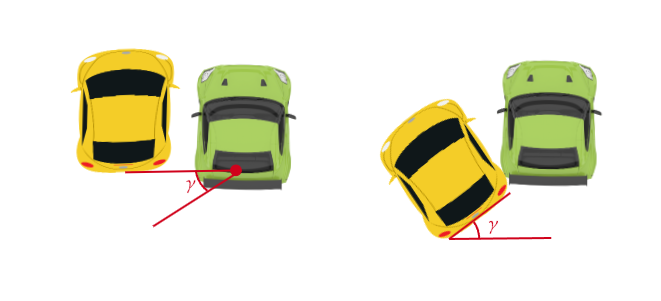

Podemos representar esta situación de una manera más conveniente como un tipo parqueo en oblicuo, como se muestra a continuación.

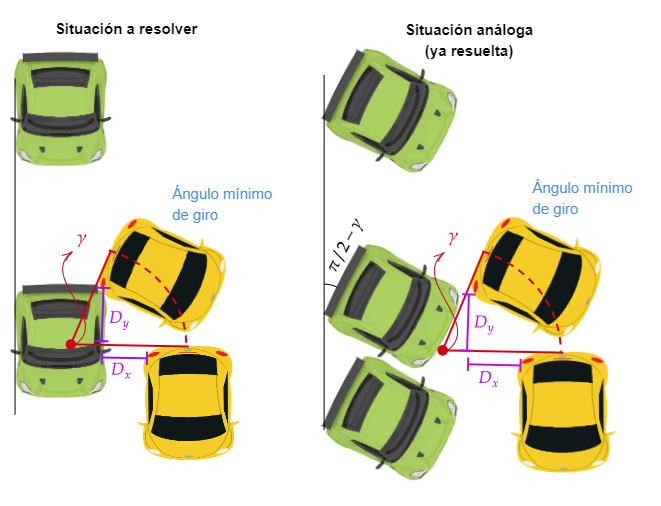

Entonces, las distancias horizontal y vertical que debe mantener la esquina trasera derecha del auto amarillo respecto a la esquina trasera izquierda del auto delante de su zona de parqueo, con el fin llegar a la posición deseada en el parqueo en paralelo, son análogas a la distancias con respecto a la esquina delantera ziquierda del auto verde a la derecha de la zona de parqueo en la situación de un parqueo en oblicuo en reversa mostrada a la derecha de la imagen. Así,
$$D_x=(l\tan(\epsilon_{min})-z)(1-\sin(\pi/2-\gamma))=(l\tan(\epsilon_{min})-z)(1-cos\gamma)$$
y
$$D_y=(l\tan(\epsilon_{min})-z)\cos(\pi/2-\gamma)=(l\tan(\epsilon_{min})-z)(\sin\gamma).$$
Reemplazando para el valor de $\gamma$ requerido que hallamos anteriormente para la etapa 3,
\begin{align}
D_x&=\frac{(l\tan(\epsilon_{min})-z)}{\rho_{da}^2}\left(\rho_{da}^2-\left(l^2\tan^2(\epsilon_{min})-z^2+ld\right)\right)\\
&=\frac{(l\cot(\delta_{max})-z)}{\rho_{da}^2}\left(\rho_{da}^2-\left(l^2 cot^2(\delta_{max})-z^2+ld\right)\right)
\end{align}
y
\begin{align}
D_y&=\frac{(l\tan(\epsilon_{min})-z)}{\rho_{da}^2}\left(l\tan(\epsilon_{min})(d-l)+z (d+l)\right)\\
&=\frac{(l\cot(\delta_{max})-z)}{\rho_{da}^2}\left(l\cot(\delta_{max})(d-l)+z (d+l)\right)
\end{align}

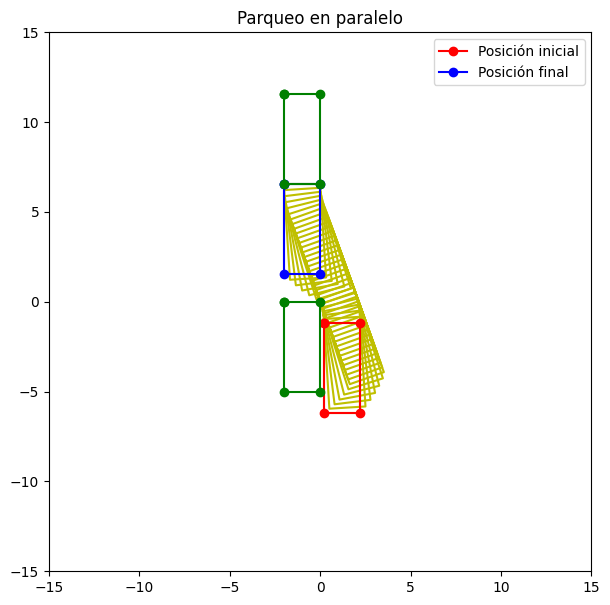

Espacio mínimo necesario: 6.558054657133989  m


In [6]:
#Algunos valores relevantes
pda2 = (L*(1/np.tan(deltamax))+z)**2 + L**2
d = np.sqrt(L**2 + 4*L*z*(1/np.tan(deltamax)))
#Condiciones iniciales
th5= -np.pi/2
x5 = (1/pda2)*(L * (1/np.tan(deltamax))-z)*(pda2 - (L**2 * (1/np.tan(deltamax))**2-z**2+L*d))+z
y5 = -(1/pda2)*(L * (1/np.tan(deltamax))-z)*(L*(1/np.tan(deltamax))*(d-L) + z*(d+L))
#Valor del ángulo gamma
gamma = np.arcsin((L*(1/np.tan(deltamax))*(d-L)+z*(d+L))/(pda2))
# Tiempo en el cual el vehículo gira un ángulo gamma sin importar la dirección
tf0 = abs(gamma) * (L/np.tan(deltamax))

#Velocidad en función del tiempo
v5 = lambda t : -1
#Dirección de las ruedas en función del tiempo
def delta5(t):
  if 0<=t<=tf0:
    return(-deltamax)
  if tf0<t<=tf0+L:
    return(0)
  if tf0+L<t:
    return(deltamax)

#Figura
fig, ax = plt.subplots(figsize=(7,7))
plt.xlim(-15,15)
plt.ylim(-15,15)
for T in np.linspace(0,2*tf0+L,30):
  C = Carro(T,x5,y5,th5,delta5,v5)
  plt.plot(C[:,0],C[:,1],'y-')
plt.plot(Carro(0,x5,y5,th5,delta5,v5)[:,0],Carro(0,x5,y5,th5,delta5,v5)[:,1],
         'ro-', label="Posición inicial")
plt.plot(Carro(2*tf0+L,x5,y5,th5,delta5,v5)[:,0],Carro(2*tf0+L,x5,y5,th5,delta5,v5)[:,1],
         'bo-', label="Posición final")
plt.plot(Carro(0,-1,0,-np.pi/2,lambda t:0,lambda t:0)[:,0],
         Carro(0,-1,0,-np.pi/2,lambda t:0,lambda t:0)[:,1],'go-')
plt.plot(Carro(0,-1,d+L,-np.pi/2,lambda t:0,lambda t:0)[:,0],
         Carro(0,-1,d+L,-np.pi/2,lambda t:0,lambda t:0)[:,1],'go-')
plt.title("Parqueo en paralelo")
plt.legend()
plt.show()
print("Espacio mínimo necesario:",d," m")

A continuación se encuentra una animación en formato MP4 sobre el parqueo en paralelo que estuvimos estudiando previamente.

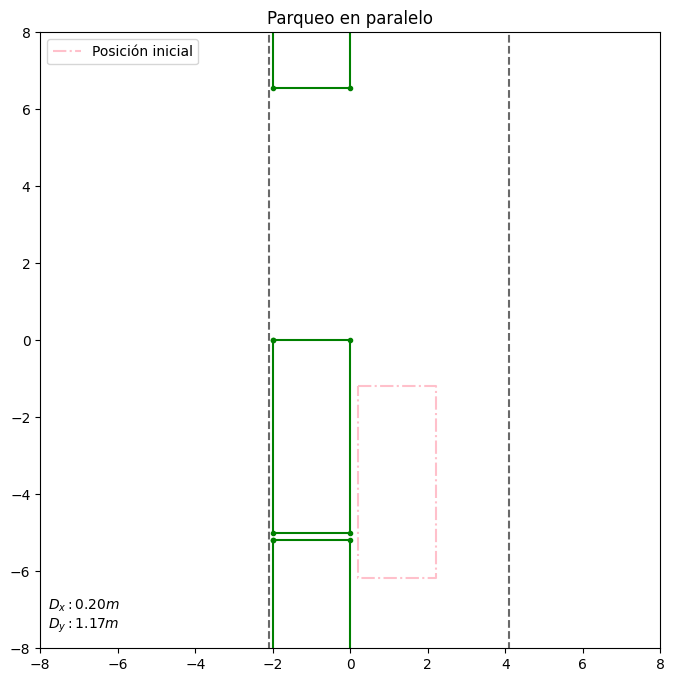

In [10]:
from matplotlib.animation import FuncAnimation

fig = plt.figure(figsize=(8,8))

axis = plt.axes(xlim =(-8, 8), ylim =(-8, 8))

line, = axis.plot([], [])

plt.text(-7.8,-7,r"$D_x: 0.20m$")
plt.text(-7.8,-7.5,r"$D_y: 1.17m$")

plt.plot(Carro(0,-1,0,-np.pi/2,lambda t:0,lambda t:0)[:,0],
         Carro(0,-1,0,-np.pi/2,lambda t:0,lambda t:0)[:,1],'g.-')
plt.plot(Carro(0,-1,-5.2,-np.pi/2,lambda t:0,lambda t:0)[:,0],
         Carro(0,-1,-5.2,-np.pi/2,lambda t:0,lambda t:0)[:,1],'g.-')
plt.plot(Carro(0,-1,d+L,-np.pi/2,lambda t:0,lambda t:0)[:,0],
         Carro(0,-1,d+L,-np.pi/2,lambda t:0,lambda t:0)[:,1],'g.-')
plt.plot(Carro(0,x5,y5,th5,delta5,v5)[:,0],Carro(0,x5,y5,th5,delta5,v5)[:,1],
         color='pink', linestyle ='-.', label="Posición inicial")
plt.plot([-2.1,-2.1],[-20,20], color="dimgray", linestyle = "--")
plt.plot([4.1,4.1],[-20,20], color="dimgray", linestyle = "--")
plt.title("Parqueo en paralelo")
plt.legend()

def init():
    line.set_data([], [])
    line.set_color(color="tomato")
    line.set_marker(marker = ".")
    return line,

def animate(i):
    if 0<=i<=2*tf0+L:
      C = Carro(i,x5,y5,th5,delta5,v5)
      x = C[:,0]
      y = C[:,1]
      line.set_data(x, y)
      return line,
    else:
      C = Carro(2*tf0+L,x5,y5,th5,delta5,v5)
      x = C[:,0]
      y = C[:,1]
      line.set_data(x, y)
      return line,

anim0 = FuncAnimation(fig, animate, init_func = init,
                      frames = np.linspace(0,2*tf0+L+0.1,200), blit = True)

In [11]:
anim0.save('ParqueoenParalelo.mp4', writer = 'ffmpeg', fps = 30)

**Referencias**

+ [1] Modelo de bicicleta cinemática: https://thomasfermi.github.io/Algorithms-for-Automated-Driving/Control/BicycleModel.html